In [19]:
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [20]:
def load_series(algorithm: str, upper_bound: str, task_name: str, root_dir: str):
    """
    kv_data has the following keys: 
    - 'S'
    - 'f(S)'
    - 'c(S)'
    - 'Lambda'
    - 'AF'
    """
    res = []
    # print(f"r:{root_dir}")
    for name in os.listdir(root_dir):
        # print(f"name:{name}")
        if not os.path.isdir(os.path.join(root_dir, name)):
            algo, up, task, b = name.strip()[:-5].split('-')
            # algo, up, task, b = name.strip()[:-5].split('-')
            # print(f"algo:{algo}, up:{up}, task:{task}, b:{b}, a:{algorithm}, u:{upper_bound}, t:{task_name}")
            
            if algo == algorithm and up == upper_bound and task == task_name:
                # print(name)
                file_path = os.path.join(root_dir, name)
                with open(file_path, "rb") as rd:
                    kv_data = pickle.load(rd)
                res.append( (eval(b), kv_data['f(S)'], kv_data['Lambda'], kv_data['AF']) )
    res = sorted(res, key=lambda x: x[0])
    # print(res)
    X, Y, Z, W = list(zip(*res))   # change it to two columns
    return X, Y, Z, W


progress:1/200
progress:2/200
progress:3/200
progress:4/200
progress:5/200
progress:6/200
progress:7/200
progress:8/200
progress:9/200
progress:10/200
progress:11/200
progress:12/200
progress:13/200
progress:14/200
progress:15/200
progress:16/200
progress:17/200
progress:18/200
progress:19/200
progress:20/200
progress:21/200
progress:22/200
progress:23/200
progress:24/200
progress:25/200
progress:26/200
progress:27/200
progress:28/200
progress:29/200
progress:30/200
progress:31/200
progress:32/200
progress:33/200
progress:34/200
progress:35/200
progress:36/200
progress:37/200
progress:38/200
progress:39/200
progress:40/200
progress:41/200
progress:42/200
progress:43/200
progress:44/200
progress:45/200
progress:46/200
progress:47/200
progress:48/200
progress:49/200
progress:50/200
progress:51/200
progress:52/200
progress:53/200
progress:54/200
progress:55/200
progress:56/200
progress:57/200
progress:58/200
progress:59/200
progress:60/200
progress:61/200
progress:62/200
progress:63/200
p

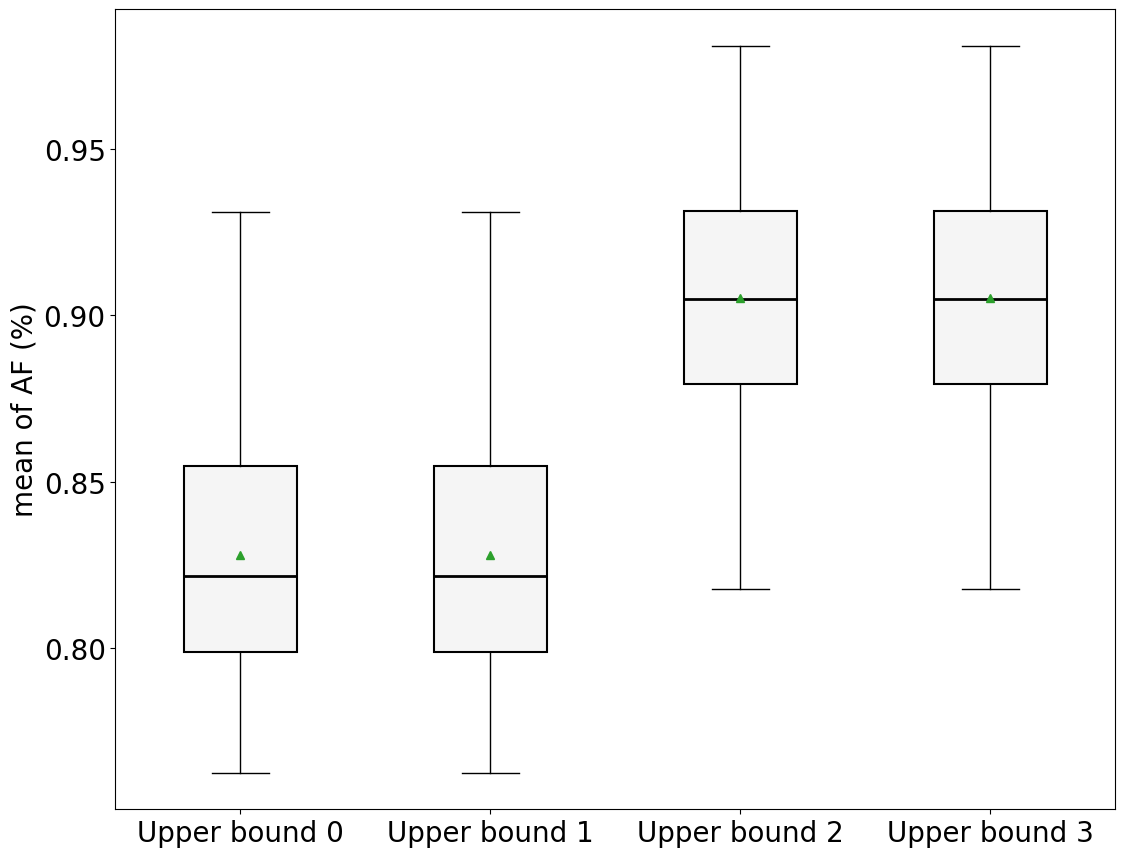

In [24]:
upper_bounds = ["ub1", "ub7", "ub7m"]
algos = ["greedy_max"]
# task_name = "FacebookGraphCoverage"
# task_name = "CalTechMaximization"
# task_name = "AdultIncomeFeatureSelection"
task_name = "YoutubeCoverage"

path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}

n = 500

sample = 100
suffix = f""

task2title = {
    "FacebookGraphCoverage":"ego-facebook Converage",
    "AdultIncomeFeatureSelection" : "income feature selection",
    "CalTechMaximization": "caltech maximization",
    "YoutubeCoverage": "youtube coverage",
}

n_list = []
algo = "modified_greedy" 

ub_list = [
    "ub1",
    "ub1m",
    "ub7",
    "ub7m"
]
ub_title_dict = {
    "ub1": "Upper bound 0",
    "ub1m": "Upper bound 1",
    "ub7": "Upper bound 2",
    "ub7m":"Upper bound 3",
}
ub_title_list = [ ub_title_dict[ub] for ub in ub_list]
colors = [
    "darkblue","mediumblue","blue","stateblue"
]
ub_mean_list = []
for ub in ub_list:
    ub_mean_list.append([])

seed_range = range(0, 200)

for seed in seed_range:
    root_dir = os.path.join("../result/archive-4", path_dict[task_name] + suffix, f"{n}",f"{seed}")
    
    for i in range(0, len(ub_list)):
        ub = ub_list[i]
        X, Y, Z, W = load_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
        ub_mean_list[i].append(np.mean(W))

    print(f"progress:{seed + 1}/{200}")
    

print(f"0:{np.mean(ub_mean_list[0])},1:{np.mean(ub_mean_list[1])},2:{np.mean(ub_mean_list[2])},3:{np.mean(ub_mean_list[3])}")

data = ub_mean_list

fs = 20
plt.rcParams["font.size"] = fs

fig = plt.figure(figsize=(10, 8))

ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("mean of AF (%)")

box_props = dict(linewidth=1.5, color="black")
median_props = dict(linewidth=2)

bp = ax.boxplot(data, patch_artist=True, tick_labels=ub_title_list, showmeans=True, boxprops=box_props, medianprops=median_props)

for median in bp["medians"]:
    median.set_color("black")

for box in bp["boxes"]:
    box.set_facecolor("whitesmoke")


plt.show()